#**Análise dos dados do AirBNB**#
##COPENHAGEN - DINAMARCA##

####Projeto do Curso Data Science na Prática, por George Vasconcelos####


O AirBNB é um serviço online comunitário para as pessoas anunciarem, descobrirem e reservarem acomodações e meios de hospedagem. lançado em 2008, com sede em San Francisco, Califórnia, é a maior plataforma de hospedagem do planeta, sem possuir nenhum hotel.

No final de 2019 anunciou IPO na bolsa de NY para 2020, com valor estimado de 31 bilhoes de dólares, porém, a pandemia pode afetar esse prazo.

para esta análise, obtivemos os dados no site Inside AirBNB (http://insideairbnb.com/get-the-data.html), que traz os dados de várias cidade do mundo.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2020-04-28/visualisations/listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,NaN,Nrrebro,55.68798,12.54571,Private room,374,2,168,2019-07-19,1.29,1,61
1,26057,Lovely house - most attractive area,109777,Kari,NaN,Indre By,55.69163,12.57459,Entire home/apt,2399,3,50,2019-12-14,0.64,1,348
2,26473,City Centre Townhouse Sleeps 1-12 persons,112210,Oliver,NaN,Indre By,55.67590,12.57698,Entire home/apt,3099,3,293,2020-03-02,2.52,1,161
3,29118,Best Location in Cool Istedgade,125230,Nana,NaN,Vesterbro-Kongens Enghave,55.67069,12.55430,Entire home/apt,798,7,22,2019-08-02,0.18,1,8
4,29618,Artsy and familyfriendly home in lovely Copenh...,127577,Simon And Anna,NaN,sterbro,55.69375,12.56945,Entire home/apt,856,7,90,2017-06-03,0.76,1,0


##**Análise dos dados**##
sta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

##Dicionário de variáveis##

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias



### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [3]:
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

###**Q2. Qual a porcentagem de valores ausentes?**###
A qualidade do Dataset é inversamente proporcional à quantidade de valores ausentes.
Para identificar as ausências, rodamos a função *isnull* e somamos (1) presentes e (0) para ausentes:

com isso, observamos que temos 5 colunas com valores ausentes:
*   Name
*   Host name
*   Neighbourhood_group
*   Last Review
*   Review per month


In [4]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.163302
last_review                       0.163302
name                              0.002058
host_name                         0.000426
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Observamos que a variável "neighbourhood_group" posssui 100% dos dados faltantes, enquanto que "reviews_per_month" e "last_review" tem 16,33% dos dados em branco. 
"name" e "host_name" tem perda insignificante.

##**Q3. Qual o tipo de distribuição das variáveis?**##
para identificar, precisamos plotar o histograma:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27ec71e4e0>,
      dtype=object)

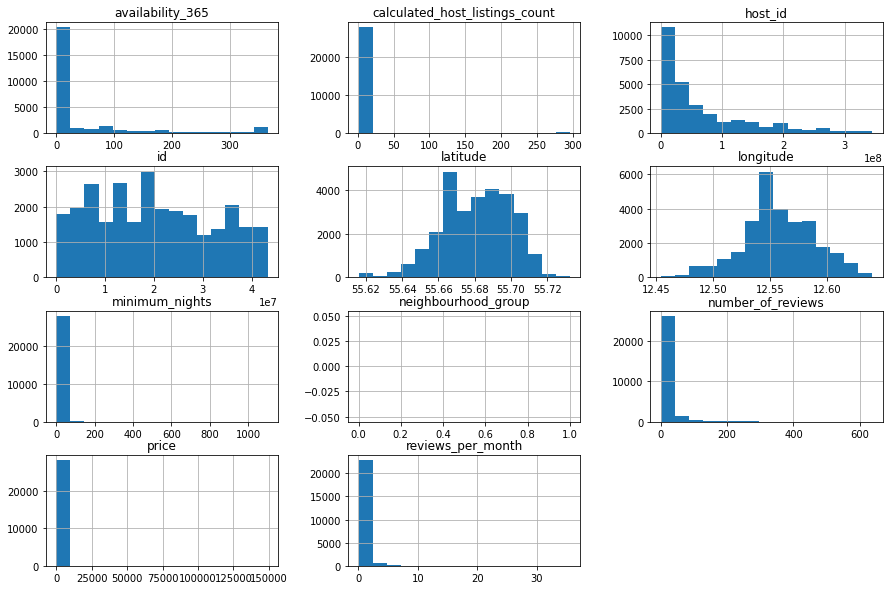

In [5]:
#Bins significa a quantidade de barras e figsize o tamanho.
df.hist(bins=15, figsize=(15,10))

##**Q4. há outliers presentes?**##
Os outliers são dados que se diferenciam drasticamente de todos os outros, são pontos fora da curva. Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [26]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,28187.000000,28187.000000,28187.000000,23584.000000,28187.000000,28187.000000
mean,875.196332,3.720439,13.894561,0.559008,4.861638,46.838933
std,2247.180398,15.006828,27.558107,0.833255,30.569316,94.651591
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,502.000000,2.000000,1.000000,0.130000,1.000000,0.000000
50%,702.000000,3.000000,5.000000,0.320000,1.000000,0.000000
75%,997.000000,4.000000,15.000000,0.670000,1.000000,39.000000
max,149219.000000,1100.000000,637.000000,35.620000,296.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

A variável price possui 75% do valor abaixo de 997, porém seu valor máximo é 149.219.
A quantidade mínima de noites (minimum_nights) está acima de 365 dias no ano.

Boxplot para Noites:

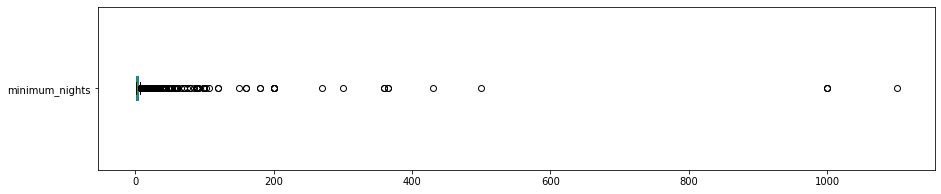

minimum_nights: valores acima de 30:
134 entradas
0.4754%


In [7]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Boxplot para preço:

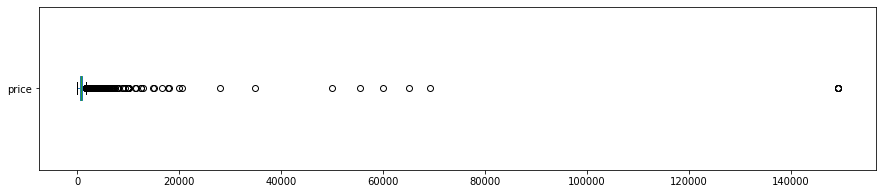


price: valores acima de 1500
1790 entradas
6.3504%


In [8]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

Histograma sem outliers:

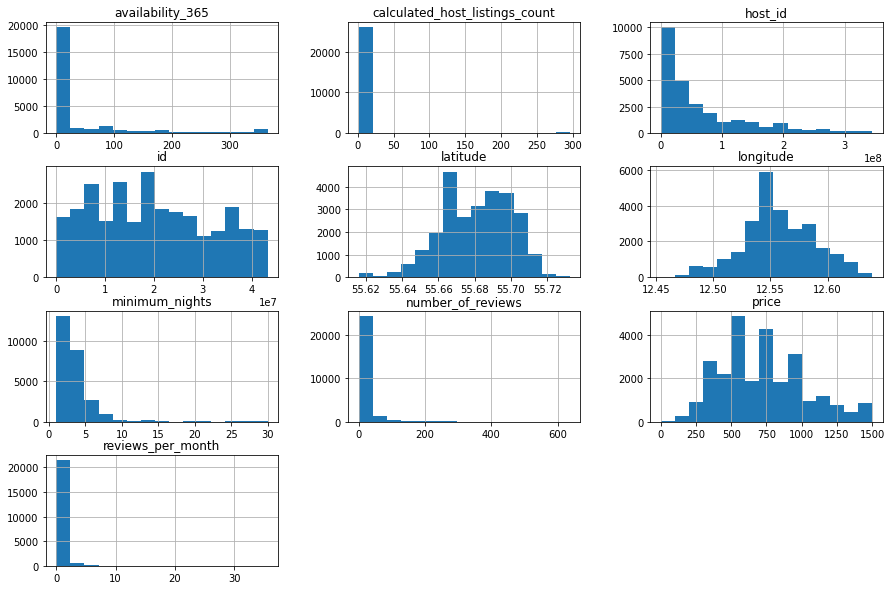

In [9]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe um impacto **mútuo** entre duas variáveis, ou seja, uma variável influencia na outra e vice-versa.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [10]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.008585,-0.020356,-0.032502,0.128654,0.155096
minimum_nights,-0.008585,1.000000,-0.070130,-0.122838,-0.072572,0.040083
number_of_reviews,-0.020356,-0.070130,1.000000,0.693797,-0.048534,0.212652
reviews_per_month,-0.032502,-0.122838,0.693797,1.000000,-0.014603,0.209103
calculated_host_listings_count,0.128654,-0.072572,-0.048534,-0.014603,1.000000,0.102564
availability_365,0.155096,0.040083,0.212652,0.209103,0.102564,1.000000


#Coeficiente de Correlação de Pearson
O **coeficiente de correlação de Pearson (r)**, também chamado de correlação linear ou r de Pearson, é um grau de relação entre duas variáveis quantitativas e exprime o grau de correlação através de valores situados entre -1 e 1, onde a correlação que se aproxima de 1, indica um aumento no valor de uma variável quando a outra também aumenta, enquanto que ao se aproximar de -1, quando o valor de uma variável aumenta o da outra diminui. 

###*Em qualquer dos casos, a correlação existe.*

Um coeficiente de correlação próximo de zero indica que não há relação entre as duas variáveis, e quanto mais eles se aproximam de 1 ou  -1, mais forte é a relação.

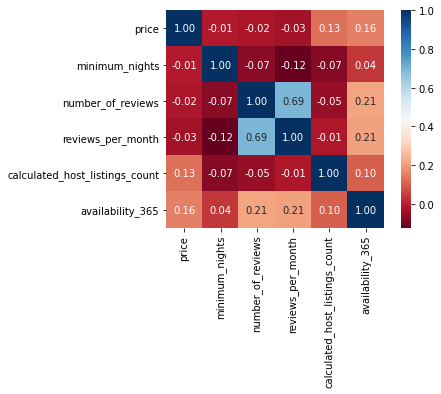

In [11]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

No caso acima, observamos que a maior correlação entre variáveis diferentes se refere a "reviews_per_month" e "number_of_reviews", o que seria natural e não nos traz nenhum insight.
Porém podemos observar uma razoável correlação entre "availability_365" e os reviews, o que indica que os imóveis que tem maior disponibilidade tem maior quantidade de avaliações, e, consequentemente, foram mais vezes alugados.

## **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [13]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    21891
Private room        4285
Shared room           77
Hotel room            21
Name: room_type, dtype: int64

In [17]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Entire home/apt    83.318109
Private room       16.308899
Shared room         0.293065
Hotel room          0.079927
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Copenhagen?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [18]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Indre By                     902.222260
Amager Vest                  766.406589
Vesterbro-Kongens Enghave    759.847498
Frederiksberg                748.391374
sterbro                      733.950431
Nrrebro                      673.032258
Amager st                    664.202993
Brnshj-Husum                 648.046693
Valby                        632.018644
Vanlse                       604.630435
Name: price, dtype: float64

Observamos que o bairro de "Indre By" tem o maoir preço. Porém para saber se a amostra é relevante, vamos listar a quantidade de imóveis por bairro. Neste caso vemos que o número é bastante considerável (2.974), o que indica que se trata de um bairro realmente valorizado.

In [23]:
# mostrar a quantidade de imóveis disponíveis por bairro
df_clean.neighbourhood.value_counts()

Nrrebro                      4991
Vesterbro-Kongens Enghave    4177
Frederiksberg                3107
Indre By                     2974
sterbro                      2784
Amager Vest                  2398
Amager st                    2005
Bispebjerg                   1408
Valby                        1180
Vanlse                        736
Brnshj-Husum                  514
Name: neighbourhood, dtype: int64

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

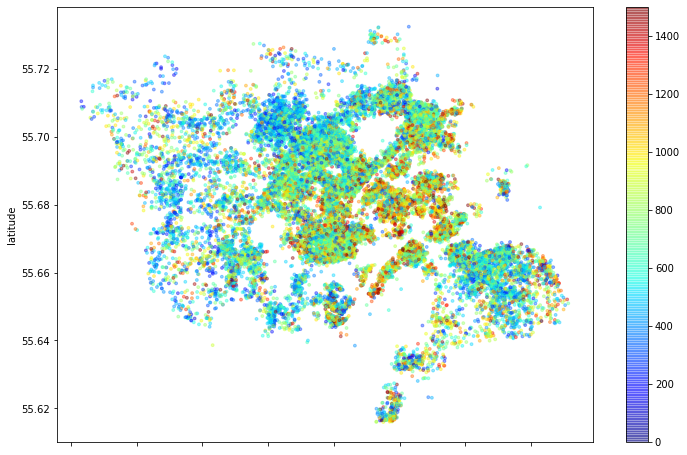

In [24]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Pode-se perceber que existe uma boa distribuição de imóveis entre os bairros, com destaque de valor para o bairro de "Indre By", em média, cerca de 25% mais caro que a média sem os outliers de preço (724,53).

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.